<a href="https://colab.research.google.com/github/Bunseki2/salifort/blob/main/Copy_of_Activity__Course_7_Salifort_Motors_project_lab_2_conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

In [90]:
#
!git clone https://github.com/Bunseki2/salifort.git

fatal: destination path 'salifort' already exists and is not an empty directory.


## Description

This capstone project analyzes an employee dataset from Salifort Motors to predict staff turnover and provide data-driven insights for the HR department. This notebook covers data analysis, building predictive models, model evaluation, and visualizations to understand why employees leave.


# **PACE stages**


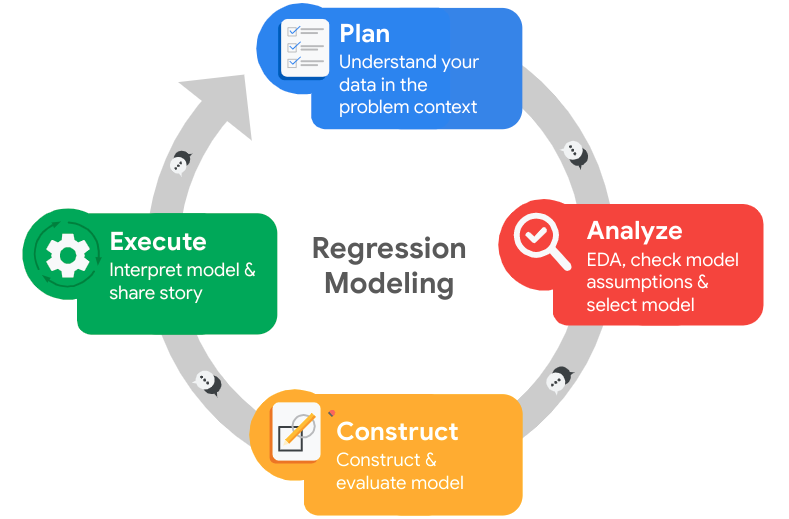

### the business scenario and problem
The HR department at Salifort Motors is seeking data-driven initiatives to improve employee satisfaction and retention. They have collected employee data but require assistance in leveraging it to understand turnover. As a data analytics professional, my goal is to analyze this data, build a model to predict employee departure, and provide insights into the factors driving attrition. Increasing employee retention is a key business objective, as finding and onboarding new employees is costly and time-consuming.

### Familiarize with the HR dataset

The dataset in this lab contains 15,000 rows and 10 columns for the variables listed below.


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

*  leadership Team at Salifort Motors.
*  goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.


## Step 1. Imports

*   Import packages
*   Load dataset



In [91]:
#!pip install xgboost

### Import packages

In [92]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,auc

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you.

In [93]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df0 = pd.read_csv("/content/salifort/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [94]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [95]:
# Gather descriptive statistics about the data

df0.describe(include='all').replace(np.nan, ' ')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999,14999
unique,,,,,,,,,10,3
top,,,,,,,,,sales,low
freq,,,,,,,,,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,,
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,,
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,,
25%,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,,
50%,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,,
75%,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,,


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [96]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [97]:
# Rename columns as needed

df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [98]:
# Rename columns as needed

df0.rename(columns = {'average_montly_hours': 'average_monthly_hours',
                      'Work_accident':'work_accident',
                      'Department': 'department'}, inplace=True)


# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [99]:
df0.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


### Check missing values

Check for any missing values in the data.

In [100]:
# Check for missing values
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
time_spent_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [101]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [102]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [103]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first', ignore_index=True)

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
df1.describe(include='all').replace(np.nan, ' ')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
count,11991.0,11991.0,11991.0,11991.0,11991.0,11991.0,11991.0,11991.0,11991,11991
unique,,,,,,,,,10,3
top,,,,,,,,,sales,low
freq,,,,,,,,,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,,
std,0.24107,0.168343,1.163238,48.727813,1.33024,0.361234,0.372133,0.129012,,
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,,
25%,0.48,0.57,3.0,157.0,3.0,0.0,0.0,0.0,,
50%,0.66,0.72,4.0,200.0,3.0,0.0,0.0,0.0,,
75%,0.82,0.86,5.0,243.0,4.0,0.0,0.0,0.0,,


### Check outliers

Check for outliers in the data.

In [105]:
# import zscore
from scipy.stats import zscore

# set a threshold for Z-score
zscore_threshold = 3

# loop through each column
for column in df1.columns:

    # check if the column is numeric
    if pd.api.types.is_numeric_dtype(df1[column]):

        # calculate Z-scores for each data point in the column
        z_scores = zscore(df1[column])

        # identify outliers using the Z-score
        outliers = (z_scores > zscore_threshold) | (z_scores < -zscore_threshold)

        # print the column name and the number of outliers
        print(f"Column: {column}, Number of outliers: {outliers.sum()}")

Column: satisfaction_level, Number of outliers: 0
Column: last_evaluation, Number of outliers: 0
Column: number_project, Number of outliers: 0
Column: average_monthly_hours, Number of outliers: 0
Column: time_spent_company, Number of outliers: 188
Column: work_accident, Number of outliers: 0
Column: left, Number of outliers: 0
Column: promotion_last_5years, Number of outliers: 203


the number of people promoted last 5 years aer onlt 203 out of 11991.

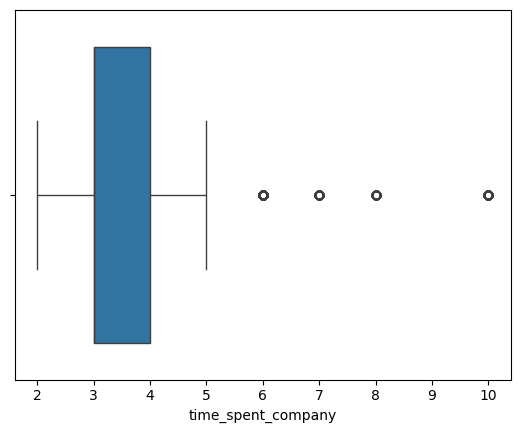

In [106]:
# Create a boxplot to visualize distribution of 'time_spend_company' and detect any outliers
sns.boxplot(data=df1, x='time_spent_company')
plt.show()

In [107]:
# Determine the number of rows containing outliers
percentile25 = df1['time_spent_company'].quantile(0.25)
percentile75 = df1['time_spent_company'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['time_spent_company'] > upper_limit) | (df1['time_spent_company'] < lower_limit)]

print("Number of rows in the data with outliers in 'time_spent_company'", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data with outliers in 'time_spent_company' 824


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, consider whether to remove outliers, based on the type of model we decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [108]:
# Get numbers of people who left vs. stayed

print(df1.value_counts(['left']))

# Get percentages of people who left vs. stayed
print('Percentages:')
print((df1.value_counts(['left'], normalize=True))*100)

left
0       10000
1        1991
Name: count, dtype: int64
Percentages:
left
0       83.39588
1       16.60412
Name: proportion, dtype: float64


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spent_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [110]:
df1.value_counts(['promotion_last_5years', 'left'],normalize=True)

promotion_last_5years  left
0                      0       0.817697
                       1       0.165374
1                      0       0.016262
                       1       0.000667
Name: proportion, dtype: float64

In [111]:
df1.value_counts(['promotion_last_5years', 'left'])

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: count, dtype: int64

In [112]:
1983/(9805 +1983)

0.16822192059721752

In [113]:
8/(195+8)

0.03940886699507389

The percentage of people who were promoted last 5 years left less than that of people who were not promoted.  

### Data visualizations

In [114]:
#!pip install --force-reinstall https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

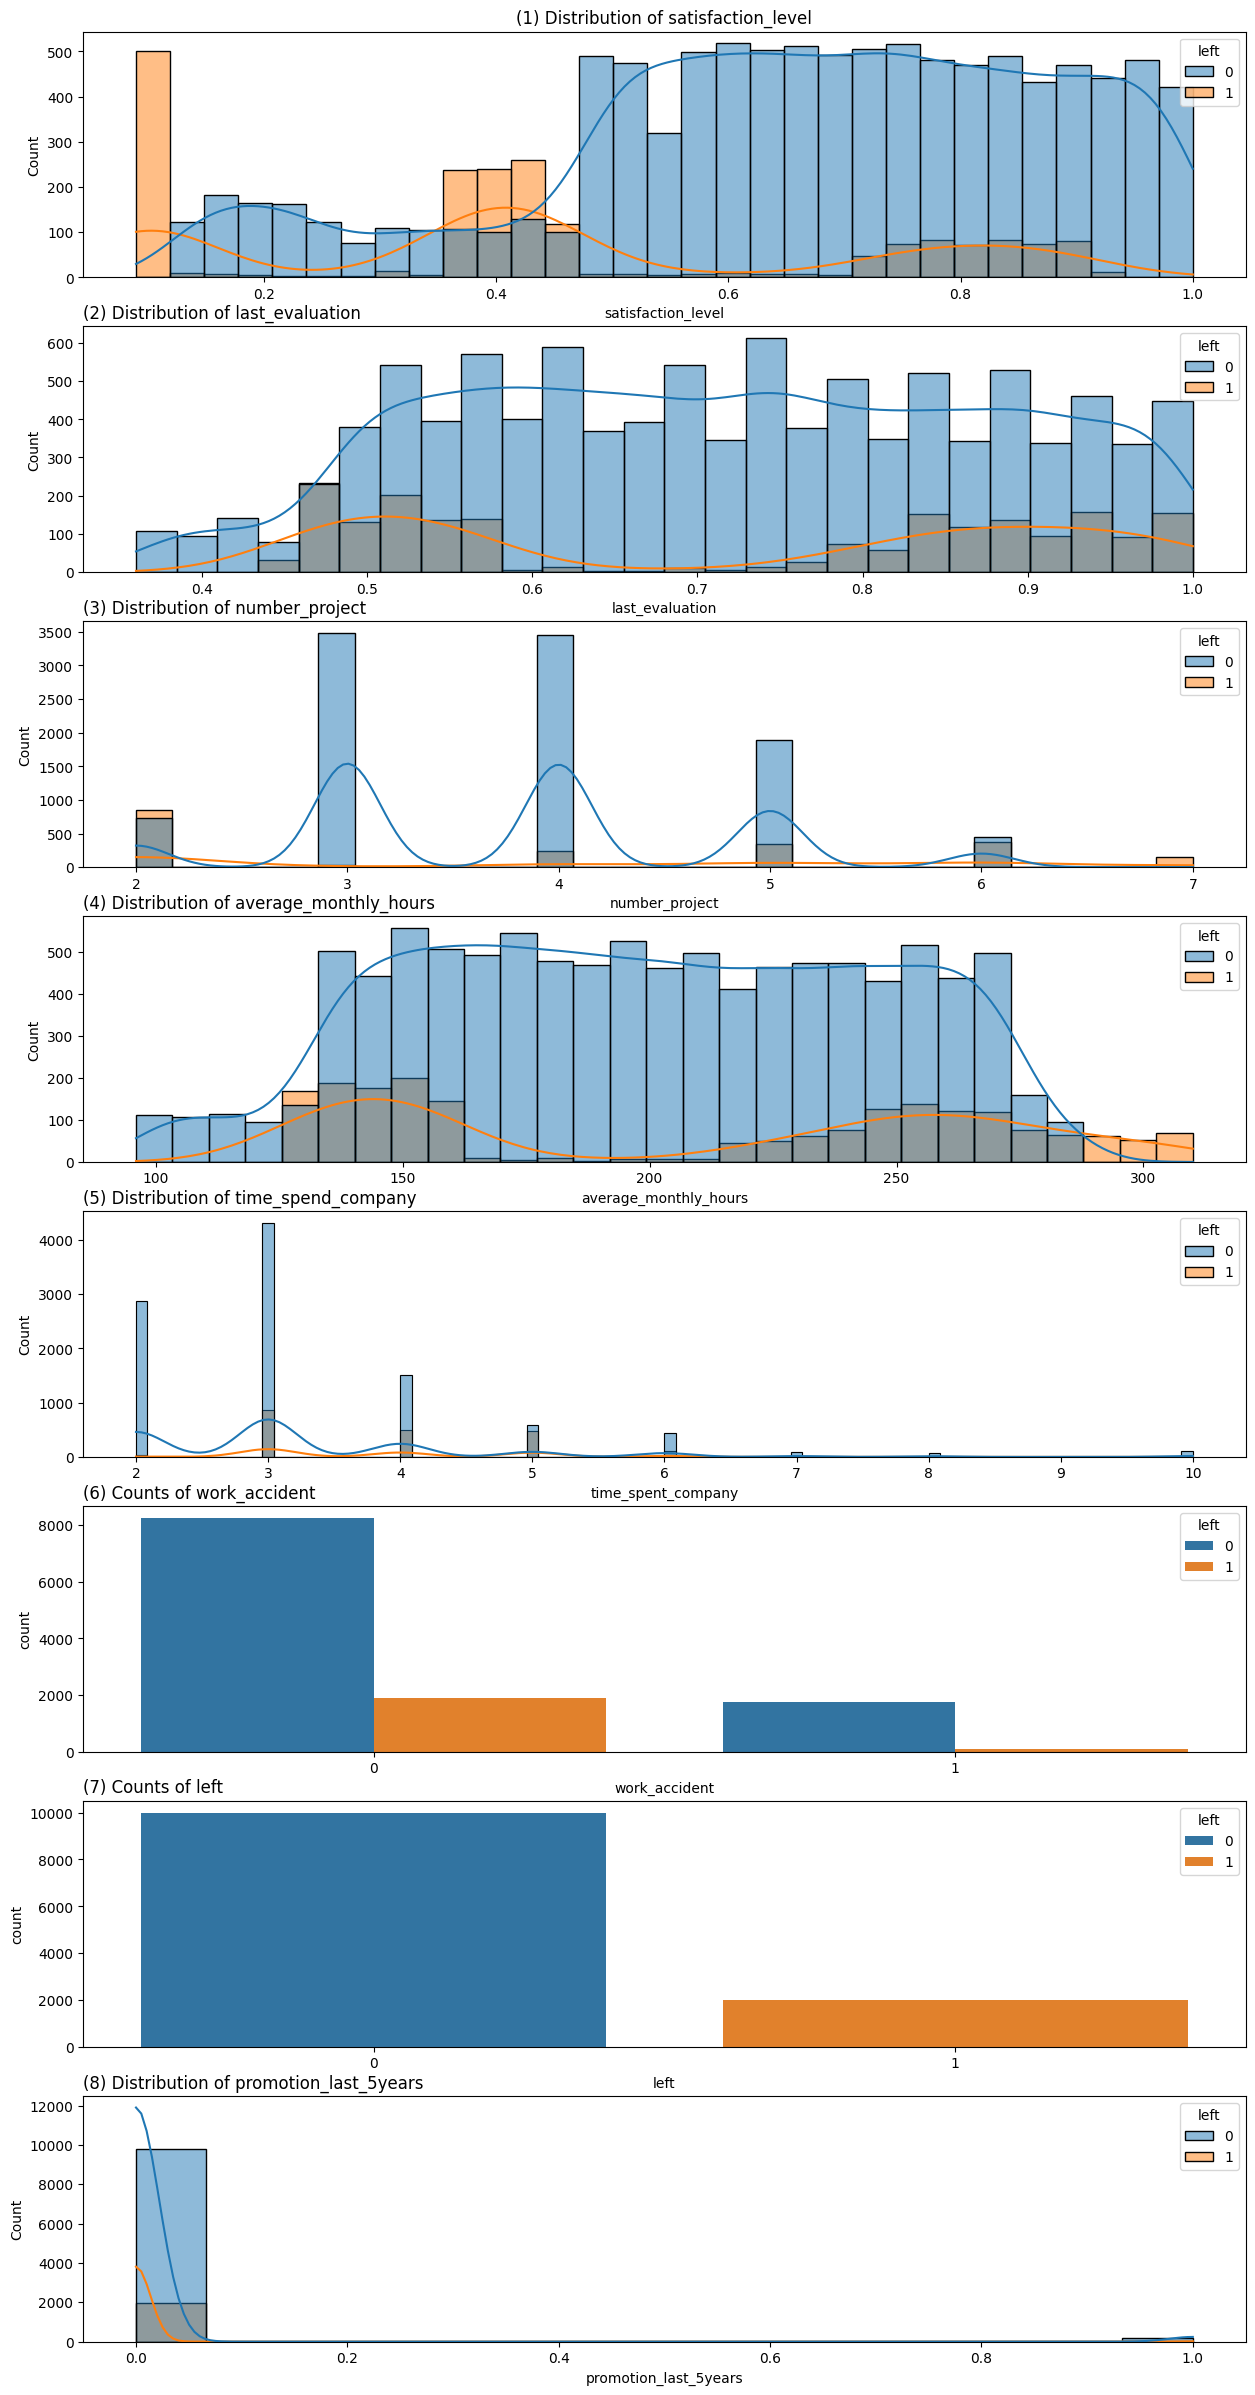

In [149]:
# set figure & size
fig, axes = plt.subplots(8,1, figsize=(15,30))

# (1) Distribution of satisfaction_level
sns.histplot(data=df1, x='satisfaction_level', hue='left', ax=axes[0], kde=True)
axes[0].set_title('(1) Distribution of satisfaction_level')

# (2) Distribution of last_evaluation
sns.histplot(data=df1, x='last_evaluation', hue='left', ax=axes[1], kde=True)
axes[1].set_title('(2) Distribution of last_evaluation', loc='left')

# (3) Distribution of number_project
sns.histplot(data=df1, x='number_project', hue='left', ax=axes[2], kde=True)
axes[2].set_title('(3) Distribution of number_project', loc='left')

# (4) Distribution of average_monthly_hours
sns.histplot(data=df1, x='average_monthly_hours', hue='left', ax=axes[3], kde=True)
axes[3].set_title('(4) Distribution of average_monthly_hours', loc='left')

# (5) Distribution of time_spend_company
sns.histplot(data=df1, x='time_spent_company', hue='left', ax=axes[4], kde=True)
axes[4].set_title('(5) Distribution of time_spend_company', loc='left')

# (6) Distribution of work_accident
# Convert the 'category' column to string type
#df1['left'] = df1['left'].astype(str)
#df1['work_accident'] = df1['work_accident'].astype(str)
sns.countplot(data=df1, x='work_accident', hue='left', ax=axes[5])
axes[5].set_title('(6) Counts of work_accident', loc='left')


# (7) Distribution of left
sns.countplot(data=df1, x='left', hue='left', ax=axes[6])
axes[6].set_title('(7) Counts of left', loc='left')

# (8) Distribution of promotion_last_5years
sns.histplot(data=df1, x='promotion_last_5years', hue='left', ax=axes[7], kde=True)
axes[7].set_title('(8) Distribution of promotion_last_5years', loc='left')
plt.show()

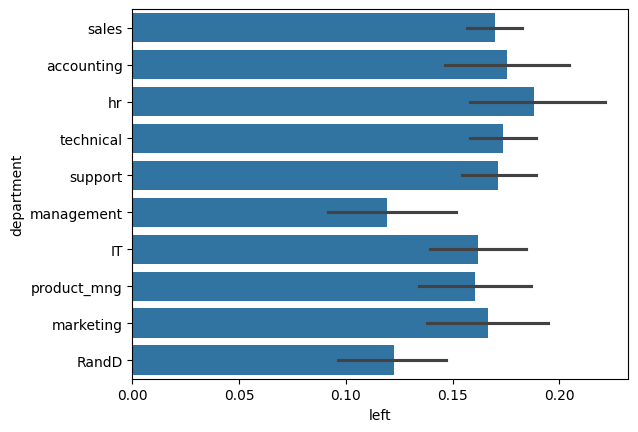

In [116]:
# Create a plot as needed
sns.barplot(data=df1, x='left',y='department')
plt.show()

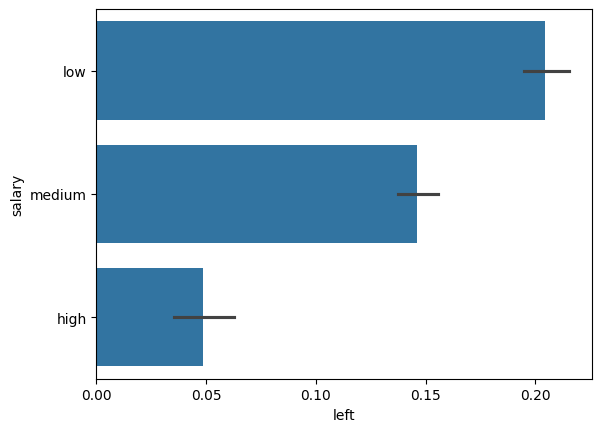

In [117]:
# Create a plot as needed

sns.barplot(data=df1, x='left',y='salary')
plt.show()

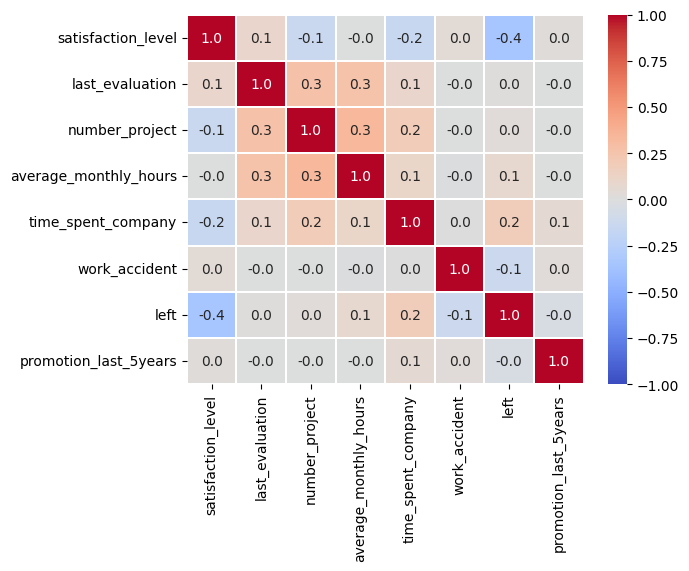

In [118]:
sns.heatmap(df1.corr(numeric_only=True),
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.1f',
            linewidths=0.05,
            cmap="coolwarm",
            square=False);
plt.show()

### Insights

*  employees with low salary tend to quit.
*  employees at management and RandD tend to stay
*  employees with low promotion_last_5years tend to quit
*  employees with high work_accident tend to stay
*  employees with high time_spent_company tend to quit
*  employees with low satisfaction_level tend to quit


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification

### Identify the types of models most appropriate for this task.

For a binary classification task like predicting whether an employee will leave or stay, several types of models are appropriate. Here are some common and suitable options:

**Logistic Regression**: This is a fundamental statistical model for binary classification. It models the probability of the target variable belonging to a particular class. It's relatively simple, interpretable, and a good starting point.

**Decision Trees**: These models split the data based on features to make predictions. They are intuitive and can capture non-linear relationships.

**Random Forests:** This is an ensemble method that builds multiple decision trees and combines their predictions. It generally provides better accuracy and robustness than a single decision tree by reducing overfitting. This was one of the models chosen in my notebook.

**Gradient Boosting Machines** (like XGBoost, LightGBM, CatBoost): These are powerful ensemble methods that build trees sequentially, with each new tree trying to correct the errors of the previous ones. They are known for their high accuracy and are often top performers in classification tasks. XGBoost was the other model chosen in my notebook, and it performed well.

**Support Vector Machines (SVMs):** SVMs find a hyperplane that best separates the different classes in the data. They can be effective, especially in high-dimensional spaces.

**K-Nearest Neighbors (KNN):** This algorithm classifies a data point based on the majority class of its nearest neighbors. It's simple but can be computationally expensive for large datasets.

**Neural Networks:** Deep learning models can be very effective for classification tasks, especially with large and complex datasets. However, they can be more computationally intensive to train and may require more data.

# When choosing a model, factors to consider include:

**Interpretability:** How important is it to understand why the model makes a prediction? (Logistic Regression and Decision Trees are generally more interpretable).

**Performance:** How accurate do the predictions need to be? (Ensemble methods like Random Forests and Gradient Boosting often provide high accuracy).

**Dataset Size and Complexity:** Some models perform better with larger datasets or when there are complex relationships between features.

**Training Time:**How quickly do you need the model to be trained?

**Overfitting:** How prone is the model to fitting the training data too closely and not generalizing well to new data? (Regularization techniques and ensemble methods help with this).

Given the dataset size (15,000 rows) and the need for potentially high accuracy to identify employees at risk, ensemble methods like Random Forests and XGBoost are excellent choices, as demonstrated in  my notebook. Logistic Regression could also be a good initial benchmark due to its interpretability.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [119]:
df2 = pd.get_dummies(df1)

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spent_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   department_IT           11991 non-null  bool   
 9   department_RandD        11991 non-null  bool   
 10  department_accounting   11991 non-null  bool   
 11  department_hr           11991 non-null  bool   
 12  department_management   11991 non-null  bool   
 13  department_marketing    11991 non-null  bool   
 14  department_product_mng  11991 non-null

In [121]:

# 1. Isolate X variables
X = df2.drop(columns=['left'])

# 2. Isolate y variable
y = df2['left']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [122]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [3, 7, None],
#             'max_features': [1.0 , 3.0],
#             'max_samples': [0.80],
#            'min_samples_leaf': [2,4],
#             'min_samples_split': [2,4],
#             'n_estimators': [100, 300],
#             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
# rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [123]:
# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3, 7, None],
             # Consider a smaller range for max_features, especially since you have many features
             'max_features': [0.6, 0.8, 1.0],
             # Ensure max_samples doesn't get too close to 1.0, which might limit diversity
             'max_samples': [0.8, 0.9],
             # Increase min_samples_leaf to avoid creating leaf nodes with very few samples
             'min_samples_leaf': [5, 10],
             # Increase min_samples_split slightly
             'min_samples_split': [5, 10],
             'n_estimators': [100, 300, 500], # Add more estimators for robustness
             }
# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')


In [124]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 31min 58s, sys: 3.15 s, total: 32min 1s
Wall time: 32min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 7, None],
                         'max_features': [0.6, 0.8, 1.0],
                         'max_samples': [0.8, 0.9], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [125]:
rf_cv.best_score_

np.float64(0.9121259904379251)

In [126]:
rf_cv.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [127]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [128]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826246,0.912126,0.86702,0.953571


In [129]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [100,300]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [130]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 31 s, sys: 433 ms, total: 31.4 s
Wall time: 18.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [100, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [131]:
xgb_cv.best_score_

np.float64(0.9104481380889319)

In [132]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 300}

In [133]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826246,0.912126,0.867020,0.953571
0,XGB cv,0.963188,0.910448,0.935774,0.979287


In [134]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [135]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [136]:
#Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826246,0.912126,0.867020,0.953571
0,XGB cv,0.963188,0.910448,0.935774,0.979287
0,RF val,0.868235,0.927136,0.896719,0.964554


In [137]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826246,0.912126,0.867020,0.953571
0,XGB cv,0.963188,0.910448,0.935774,0.979287
0,RF val,0.868235,0.927136,0.896719,0.964554
0,XGB val,0.968085,0.914573,0.940568,0.980817


In [138]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826246,0.912126,0.867020,0.953571
0,XGB cv,0.963188,0.910448,0.935774,0.979287
0,RF val,0.868235,0.927136,0.896719,0.964554
0,XGB val,0.968085,0.914573,0.940568,0.980817
0,XGB test,0.953488,0.927136,0.940127,0.980409


In summary, the evaluation metrics demonstrate that the trained XGBoost model is a strong predictor of employee attrition, offering a good balance of correctly identifying employees who will leave (high recall) while also being accurate in its predictions of who will leave (high precision). This makes it a valuable tool for the HR department to use for data-driven retention strategies.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




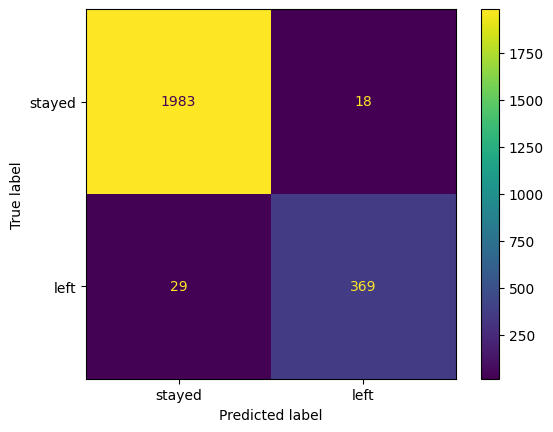

In [139]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'])
disp.plot();

In [140]:
plt.show()

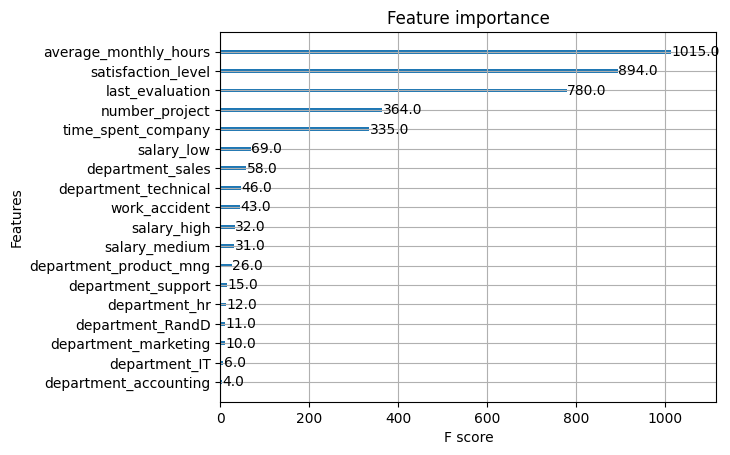

In [141]:
plot_importance(xgb_cv.best_estimator_);
plt.show()

In summary, this feature importance plot highlights that factors related to workload ('average_monthly_hours'), job satisfaction ('satisfaction_level'), and performance ('last_evaluation') are the strongest predictors in the model

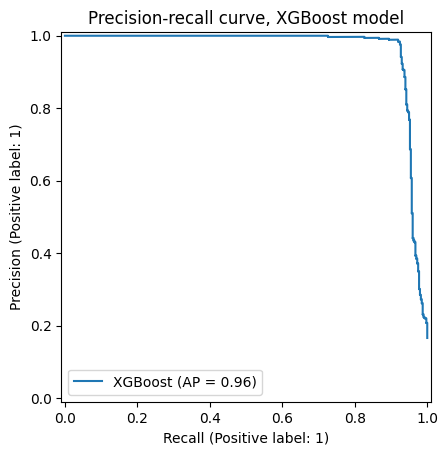

In [142]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');
plt.show()

In summary, this Precision-Recall curve for the XGBoost model shows that it is a highly effective classifier for this particular task, achieving excellent precision and recall across a wide range of thresholds. The high Average Precision score further supports this conclusion.

In [143]:
# Get predicted probabilities on the test data
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[9.9928916e-01, 7.1086985e-04],
       [1.5040636e-03, 9.9849594e-01],
       [9.4895214e-01, 5.1047884e-02],
       ...,
       [9.9668747e-01, 3.3125423e-03],
       [9.9903280e-01, 9.6717622e-04],
       [1.8656850e-03, 9.9813432e-01]], dtype=float32)

In [144]:
# Create a list of just the second column values (probability of target)
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.9 else 0 for x in probs])
new_preds

array([0, 1, 0, ..., 0, 0, 1])

In [145]:
# Get evaluation metrics for when the threshold is 0.4
get_test_scores('XGB, threshold = 0.9', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.9",0.98892,0.896985,0.940711,0.981242


In [146]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


In [147]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.92)

(np.float64(0.757), 0.9195979899497487)

In [148]:
# Create an array of new predictions that assigns a 1 to any value >= 0.124
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.757 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.124
get_test_scores('XGB, threshold = 0.757', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.757",0.983871,0.919598,0.950649,0.98416


# **Key Insights**:

**How Busy They Are and Their Reviews:** Working too much or too little, and how their last performance review went, are the biggest signs someone might leave. If someone's review score is in a certain range (either very high or very low), they might be thinking about leaving.

**How Happy They Are:** If an employee isn't very happy with their job, they are much more likely to quit.

**How Many Projects They Have:** Having too few projects (maybe they're bored) or too many (maybe they're stressed) makes someone more likely to leave.

**How Long They've Been Here:** Employees who have been with the company for a few years, especially around 4 to 6 years,
are more likely to look for new jobs.

**Pay and Promotions:** Lower pay and not getting promoted recently also make it more likely someone will leave.

**Work Accidents:** Surprisingly, if someone had a work accident, they are less likely to leave. This might mean the company supported them well after the accident.

# Business recommendations:

**Watch Workloads and Reviews:** Keep an eye on employees who are working extreme hours or have unusual performance review scores. Talk to them to see what's going on.

**Make Employees Happier:** Find ways to understand what makes employees unhappy and try to fix those things. Happy employees are more likely to stay.

**Balance Projects:** Make sure people have a good amount of projects – not too few and not too many.

**Focus on Employees Here for a Few Years:** Create special programs or offer more career help to employees who have been here for about 4 to 6 years to encourage them to stay.

**Check Pay and Promotions:** Make sure salaries are fair and there are clear ways for employees to move up in the company.

**Learn from Accidents:** Figure out why employees who had accidents stayed and see if those positive reasons can be used to keep other employees.

# Some bigger ideas for the company leaders:

**Use a System to Spot Risky Employees:** Get a tool that can automatically find employees who are likely to leave so we can help them before they decide to quit.

**Give Managers Information:** Give managers the tools and information they need about their team's workload and happiness so they can better support their team.

**Talk to People Who Leave (and Others):** Do exit interviews and talk to employees who fit the "high-risk" profile to really understand why they leave.

**Have Different Ways to Help:** Have a variety of options to help employees, like changing their work hours, offering training, or recognizing their good work.

**Keep Checking the Model:** Employee reasons for leaving can change. We should regularly update the model and check if it's still working well.

# To improve the model:
*  Adding more details about the job or how different factors work together.
*  Using other types of prediction methods.
*  Dealing with unusual data points differently.
*  Trying more options to fine-tune the model.
*  Using different ways to check if the model is accurate.
*  Adding other information, like how our pay compares to other companies.


# Use this data to answer other questions, like:
*  Why do people leave certain departments more than others?
*  How likely is each specific employee to leave?
*   How much money could we save by keeping more employees?
*   Does being likely to leave relate to how well someone performs or how involved they are at work?
*   Can we predict why someone leaves based on surveys?
*   Does the reason someone leaves change based on things like their age or how long they've been in their current role?


# Ethics:

**Keep Employee Data Secret:** We must protect employee information and only use it for this project.

**Be Fair:** The model shouldn't unfairly target any group of employees.

**Explain Things:** We should try to explain why the model thinks someone might leave.

**Help, Don't Punish:** We should use this information to help employees and make things better, not to cause problems for them.

**Don't Mislead:** Make sure people understand the model isn't perfect and might sometimes be wrong.

**Only Use for This Reason:** We should only use this data and model to help with employee retention.

**Maybe Tell Employees (Generally):** It might be a good idea to let employees know (without sharing their personal data) that the company is trying to understand why people leave to make the workplace better.